In [4]:
import numpy as np
import matplotlib.pyplot as plt
from numpy import linalg as la
import matplotlib.animation as animation
%matplotlib widget

In [2]:
poweroveromega3EP = np.load("../data/poweroveromega3EP.npz")
poweroveromega3EPss = np.load("../data/poweroveromega3EPss.npz")
totalfield3EP = np.load("../data/totalfield3EP.npz")
searchmap3EP = np.load("../data/searchmap3EP.npz")

### 3 scatterers - total field

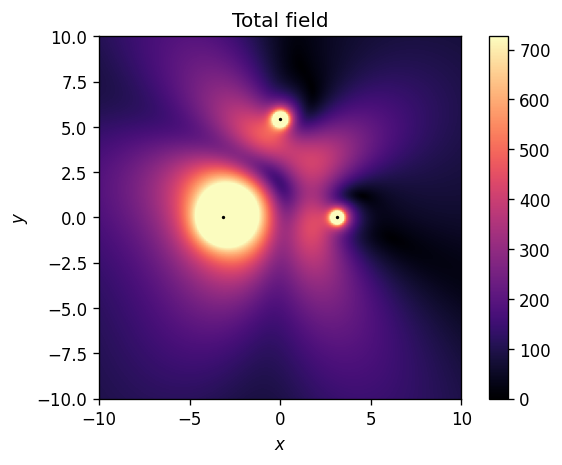

In [3]:
fig, ax = plt.subplots(dpi=120)
plt.gcf().set_facecolor("white") # set white background

giff = np.load("../gif/gif1.npz")

scattpos = giff["scattpos"]
xx = giff["xx"]
yy = giff["yy"]
phitot = giff["phitot"]

for i in range(scattpos.shape[0]):
    plt.scatter(scattpos[i, 0], scattpos[i, 1], c='k', s=1)
plt.imshow(np.abs(phitot),
           origin="lower",
           extent=(xx[0], xx[-1], yy[0], yy[-1]),
           cmap="magma")

plt.colorbar()
plt.clim(0, np.max(np.abs(phitot))/30)
plt.xlabel("$x$")
plt.ylabel("$y$")
plt.title("Total field")

plt.show()

### 3 scatterers - total field aniimation

NameError: name 'animation' is not defined

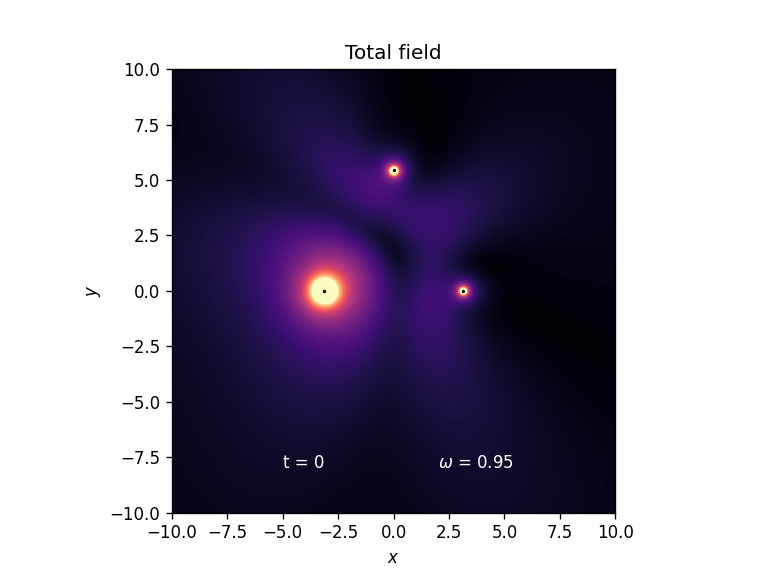

In [5]:
fig, ax = plt.subplots(dpi=120)
plt.gcf().set_facecolor("white") # set white background

omegaspan = np.load("../gif/gif1.npz")["omegaspan"]
phiinput = np.load("../gif/gif1.npz")["phiinput"]
scattpos = np.load("../gif/gif1.npz")["scattpos"]
xx = np.load("../gif/gif1.npz")["xx"]
yy = np.load("../gif/gif1.npz")["yy"]
phitot = np.load("../gif/gif1.npz")["phitot"]

ngiff = 200
giff = np.zeros((ngiff, np.size(xx), np.size(yy)))
for i in range(ngiff):
    giff[i] = abs(np.load("../gif/gif"+str(i+1)+".npz")["phitot"])
for i in range(scattpos.shape[0]):
    plt.scatter(scattpos[i, 0], scattpos[i, 1], c='k', s=1)
# y_init_points, = plt.plot(scattpos[0, 0], scattpos[0, 1], marker='.', markersize=1.5, c='k')
y_init = plt.imshow(giff[0], origin="lower",
                          extent=(xx[0], xx[-1], yy[0], yy[-1]),
                          cmap="magma", aspect=1)
time_init = plt.text(-5, -8, "t = 0", c='w')
omegaspan_init = plt.text(2, -8, "$\omega$ = "+str(omegaspan[0]), c='w')
plt.clim(0, np.max(giff[int(ngiff/2)])/2000)
plt.xlabel("$x$")
plt.ylabel("$y$")
plt.title("Total field")

n_frames = ngiff
def animate(i):
    i_time = int(i/n_frames*100)
    # y_init_points.set_data(scatterer_locations[0, 0, 3400]+(scatterer_locations[0, 0, 3400 + i]-scatterer_locations[0, 0, 3400])*10, scatterer_locations[0, 1, 3400 + i])
    y_init.set_data(giff[i])
    time_init.set_text("t = {0:d}".format(i_time))
    omegaspan_init.set_text("$\omega$ = {0:.3f}".format(omegaspan[i]))
    # return y_init_points, y_init, time_init
    return y_init, time_init, omegaspan_init

_animation = animation.FuncAnimation(fig, animate, frames=n_frames, interval=50, blit=False)
plt.show()

writer = animation.PillowWriter(fps=30)
_animation.save("animation.gif", writer=writer)

### 3 scatterers - output power over omega - EP

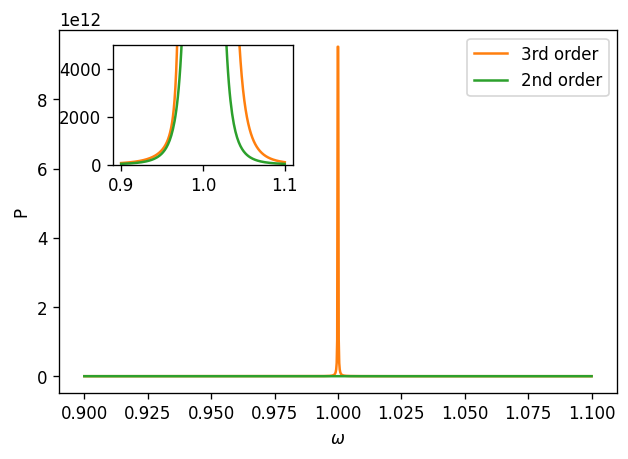

In [63]:
# here, the eigenvalues go to zero AND the eigenvectors coalesce

fig, ax = plt.subplots(dpi=120)

ax.plot(poweroveromega3EPss["omega"], poweroveromega3EPss["P"], label='3rd order', color="C1")
ax.plot(poweroveromega["omega"], poweroveromega["P"], label="2nd order", color="C2")
ax.set_xlabel("$\\omega$")
ax.set_ylabel("P")
ax.legend()

ax_in = fig.add_axes([0.2, 0.6, 0.25, 0.25])
ax_in.plot(poweroveromega3EP["omega"], poweroveromega3EP["P"], color="C1")
ax_in.plot(poweroveromega["omega"], poweroveromega["P"], color="C2")
ax_in.set_ylim(0, 5000);

### 3 scatterers - search peak map

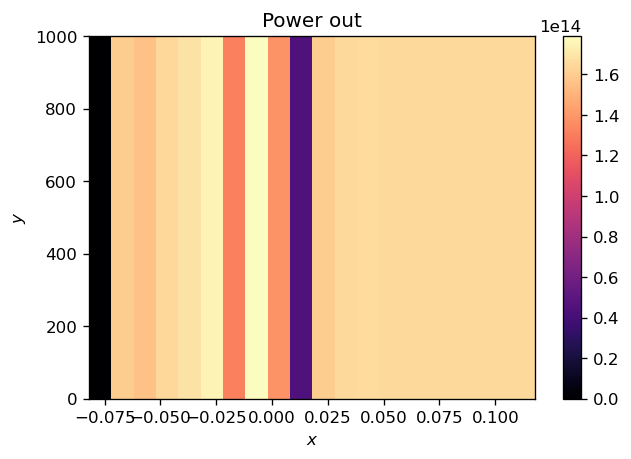

In [57]:
fig, ax = plt.subplots(dpi=120)
plt.gcf().set_facecolor("white") # set white background

xx = searchmap3EP["xx"]
yy = searchmap3EP["yy"]
mapp = searchmap3EP["map"]

plt.imshow(mapp,
           origin="lower",
           extent=(xx[0], xx[-1], yy[0], yy[-1]),
           cmap="magma",
           aspect='auto')

plt.colorbar()
plt.clim(0, np.max(mapp))
plt.xlabel("$x$")
plt.ylabel("$y$")
plt.title("Power out")

plt.show()